### Student: Garret Molloy
### Student ID: 9021906



# Lab 5: Feature Selection 

This notebook builds on top of Lab 4 by introducing feature selection into the process of selecting the best classifier for a binary classification problem.

The feature selection method applied here is Recursive Feature Elimination (RFE) as demonstrated in the tutorial at https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.

In this demonstration we use a modified version of the seeds data set (see https://archive.ics.uci.edu/ml/datasets/seeds), which is the same data set used in Lab 4.

## A. Preparation

### Import Python modules

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

### Load and prepare the dataset for training and evaluation
Feel free to apply any other pre-processing technique at this point.

In [2]:
lab5_df = pd.read_csv("./winequality_red.csv")
lab5_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
import matplotlib.pyplot as plt

lab5_df['quality'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel("quality")
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
lab5_df['quality'] = np.where(lab5_df['quality'] >5, 1,0)

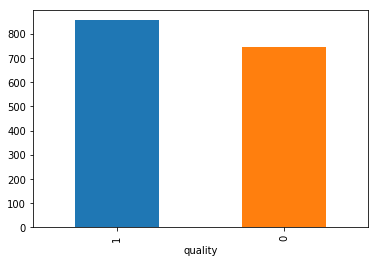

In [5]:
lab5_df['quality'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel("quality")
plt.show()

In [6]:
# target attribute
target_attribute_name = 'quality'
target = lab5_df[target_attribute_name]

# predictor attributes
predictors = lab5_df.drop(target_attribute_name, axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

Split the data set into a training (80%) and test (20%) data sets.

In [7]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

## B. Feature Selection

#### 1. Apply RFE with SVM for selecting the best features

In [8]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, 3)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False  True False False False False False False False  True  True]
[5 1 9 8 2 4 3 6 7 1 1]


#### 2. Apply RFE with Logistic Regression for selecting the best features

In [9]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression()
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True False False False False  True False False False  True]
[4 1 9 6 3 7 1 5 8 2 1]


D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarn

## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [10]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [11]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [24]:
classifier = svm.SVC(gamma='auto')

In [25]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.709375

In [26]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.709375

In [27]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.721875

## C. Task 1 Conclusion

The results for our new dataset also have a higher score for the RFE model with SVM 
evidence that model2 is most accurate.

Indeed when I ran it a second time I did not get a better model2.


## Task 2: Multiple Runs

In [31]:
model1_scores = []
model2_scores = []
model3_scores = []

for lp in range(1000):
    
    # pepare independent stratified data sets for training and test of the final model
    predictors_train, predictors_test, target_train, target_test = train_test_split(
            predictors, target, test_size=0.20, shuffle=True, stratify=target)
    
    estimatorSVM = svm.SVR(kernel="linear")
    selectorSVM = RFE(estimatorSVM, 3)
    selectorSVM = selectorSVM.fit(predictors_train, target_train)
    estimatorLR = LogisticRegression(solver='liblinear')
    selectorLR = RFE(estimatorLR, 3)
    selectorLR = selectorLR.fit(predictors_train, target_train)
    
    predictors_train_SVMselected = selectorSVM.transform(predictors_train)
    predictors_test_SVMselected = selectorSVM.transform(predictors_test)
    
    predictors_train_LRselected = selectorLR.transform(predictors_train)
    predictors_test_LRselected = selectorLR.transform(predictors_test)
    
    classifier = svm.SVC(gamma='auto')
    
    model1 = classifier.fit(predictors_train_SVMselected, target_train)
    model1_scores.append(model1.score(predictors_test_SVMselected, target_test))
    
    model2 = classifier.fit(predictors_train_LRselected, target_train)
    model2_scores.append(model2.score(predictors_test_LRselected, target_test))

    model3 = classifier.fit(predictors_train, target_train)
    model3_scores.append(model3.score(predictors_test, target_test))
                         


In [32]:
scores = pd.DataFrame(data={'SVM Selected' : model1_scores, 
                            'LR Selected'  : model1_scores, 
                            'All Features' : model3_scores})

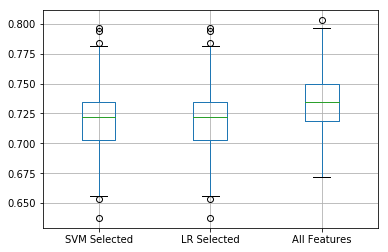

In [33]:
scores.boxplot()

## Task 2 Conclusion

Still seeing that model3 (All Features used) has the best average. This is not expected.

